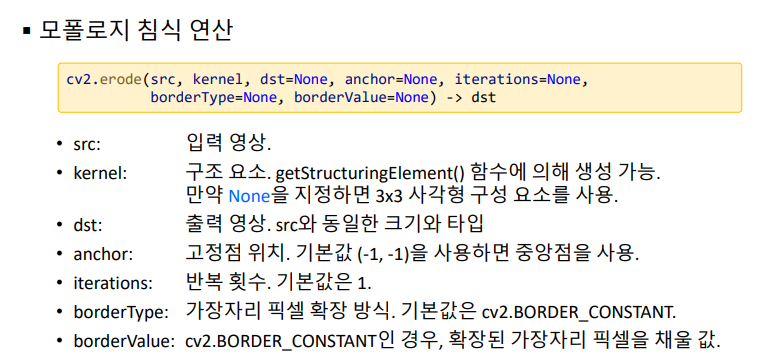

Kernel은 StructuringElement() 함수로 따로 만들어주어야 합니다.  
그렇지만 보통 none을 주면 3by3으로 제공합니다. 알아서 내부적으로 3by3 structure를 만들기 때문인데요. 그리고 iterations을 쓰면 여러번 호출없이 숫자만 입력해주면 여러번 해줍니다. 기본값은 1로 설정이 됩니다.

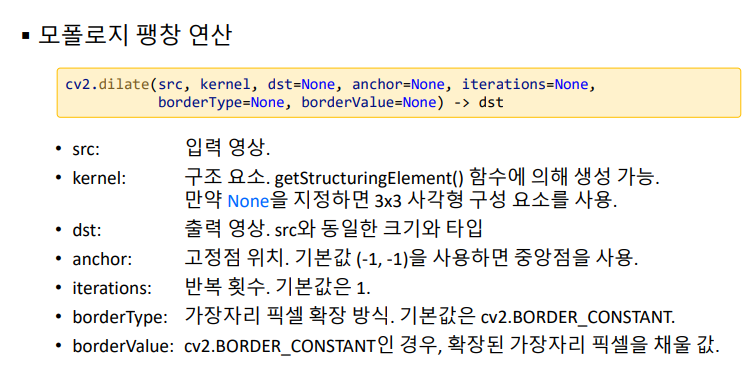
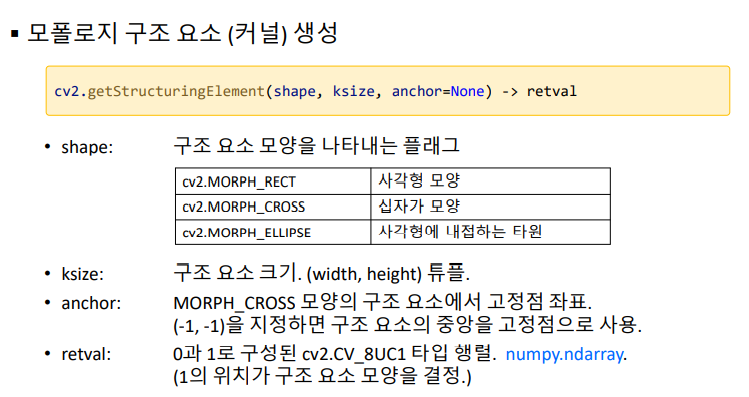
앞서 커널을 만드는 함수를 말씀드렸는데요. 여기서 제가 직접 마스크를 만드는 것입니다. 이때 shpe에서 ECLIPSE를 선택하면 원모양이 됩니다. 

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

!pip install opencv-python

In [2]:
src = cv2.imread('circuit.bmp', cv2.IMREAD_GRAYSCALE)

In [3]:
if src is None:

    print('Image load failed!')

    sys.exit()

마스크인 커널을 생성해 준 뒤에 erode를 수행합니다.

In [4]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))

#가로가 5, 세로가 3 pixel로 되어있는 3행 5열의 행렬을 structure로 썼다.

dst1 = cv2.erode(src, se)

이번엔 세로만 채우기 위해 1by7마스크로 해보겠습니다. 그리고 팽창을 줍니다.  
여기서 dilate(src,None)을 해주면 단순히 3by3 마스크로 팽창연산을 하게 됩니다.

In [5]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7)) #세로만 채우고 싶을때에는 내가 행렬을 지정해 줄 수있다.

dst2 = cv2.dilate(src, se)

#ds2=cv2.dilate(src,None) #None으로 해주면 그냥 3by3 마스크로 팽창한다.

#그냥 단순히 3by3 팽창연산

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1878eed65b0>)

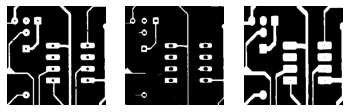

In [8]:
plt.subplot(131),plt.axis('off'),plt.imshow(src,cmap='gray')
plt.subplot(132),plt.axis('off'),plt.imshow(dst1,cmap='gray')
plt.subplot(133),plt.axis('off'),plt.imshow(dst2,cmap='gray')

In [9]:
cv2.imshow('src', src)

cv2.imshow('dst1', dst1)

cv2.imshow('dst2', dst2)

cv2.waitKey()

cv2.destroyAllWindows()